# Tutorial to Illustrate the Concepts in the Perspective Article: Empowering Statistical Methods for Cellular and Molecular Biologists

## Daniel A. Pollard$^{1}$

$^{1}$Department of Biology, Western Washington University, Bellingham, WA 98225-9160

# Introduction
In this tutorial, R statistical software is used to analyze five data sets (provided as Excel files), each using a different statistical test:
1. Welch's t-test for unequal variances
2. Student's t-test on log transformed responses
3. Logistic regression for categorical response and two treatment variables
4. Chi-Square contingency test on combined response and combined treatment groups
5. ANOVA with Tukey-Kramer post-hoc

For each example, the following steps are taken:
-  State biological hypothesis
-  State the number and types of variables
-  Determine the preferred statistical test and null hypothesis
-  Check if data meet the assumptions of the preferred statistical test
-  Decide what statistical test to use
-  Run the statistical test
-  Interpret the results of the statistical test
-  Display the data and statistical results in a figure

You do not need to install R or perform any of the analyses in the tutorial in order to learn from the examples.

### Downloading and using R
R is free statistical software (https://www.r-project.org/). It can be downloaded at https://cran.r-project.org/mirrors.html and installed on any OS.

If you are new to R, we recommend going through tutorials, such as the following: https://cran.r-project.org/manuals.html

We also highly recommend downloading and installing R-Studio (https://www.rstudio.com/), which offers a more user-friendly interface for R.

### Downloading and using Jupyter
Jupyter is free software for building data analysis notebooks with embedded programming language code, such as R. This tutorial was created in Jupyter and can be run as a live notebook with executable and editable R code if Jupyter is installed.

To install Jupyter, following the instructions on this page: https://jupyter.org/install
After Jupyter is installed, you will also need to allow Jupyter to run R by following the instructions on this page: https://anaconda.org/chdoig/jupyter-and-conda-for-r/notebook

### Tips on reading and using the tutorial
The tutorial is formatted with narrative text like this, R code blocks in grey boxes (see just below), and output from running the R code (including plots) just after the R code blocks.

In [1]:
# this line that starts with the pound sign is a comment in a block of R code and does not get run
print('this is the output from some R code')

[1] "this is the output from some R code"


The R code in the grey boxes can be cut and pasted into R or R-Studio. If you are running Jupyter, the R code throughout the tutorial can be executed using the "Run" button and can also be edited.

### Installing 'readxl' and 'plyr' packages
There are numerous ways to read data into R. In this tutorial we will be using a very convenient function called readxl() that takes an Excel file as input and creates an R dataframe from it. Because this function is not part of the standard functions in R, we have to install the 'readxl' package to be able to use the function.

We will also install the 'plyr' package. This package has a function called ddply() that lets us calculate many descriptive statistics for a dataset with one function call and it outputs the results in a neat and tidy dataframe.

Run the following code to install the packages.  You only need to do this once.

In [1]:
install.packages('readxl', repos='http://cran.us.r-project.org')
install.packages('plyr', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Loading packages
Although you only have to install a specialized package once, you have to load the package every time you restart R and want to use functions in the package.  Packages can be loaded using the library() function as follows.

In [2]:
library("readxl")
library("plyr")

In [3]:
setwd('~/github/bmi_206/lab1/')

# Example 1: Welch's t-test for unequal variances
In this first example, we are testing the biological hypothesis that a mutant genotype affects a phenotype we are measuring. Our statistical null hypothesis is that genotype has no effect on the measurement.

There are two variables in the experiment: Genotype and Measurement. Genotype is a categorical variable with two possible values: WT and Mutant. Measurement is a continuous numerical variable. Measurement is our response variable. Genotype is our treatment variable.

Based on these two variables, we will run a Student's two-sample t-test as long as we can meet the assumptions of that test: normally distributed responses within each treatment and equal variances between treatments. We have to look at our data to see if we have met these assumptions.

In [4]:
# read fist data file into data frame object
data1 <- read_xlsx('DataSet1.xlsx', col_names = TRUE)
# note that the above line of code assumes the data file is in the same folder as the notebook
# look at the first several rows of data
head(data1)
# make genotype column a categorical variable which are called factors in R
data1$Genotype <- as.factor(data1$Genotype)
# check that data structure is correct
str(data1)
# look at summary information
summary(data1)

Genotype,Measurement
WT,12.0
WT,8.0
WT,14.0
WT,14.5
WT,3.5
WT,10.0


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	40 obs. of  2 variables:
 $ Genotype   : Factor w/ 2 levels "Mutant","WT": 2 2 2 2 2 2 2 2 2 2 ...
 $ Measurement: num  12 8 14 14.5 3.5 10 9.5 15 11 10.5 ...


   Genotype   Measurement   
 Mutant:23   Min.   : 2.00  
 WT    :17   1st Qu.:10.00  
             Median :14.25  
             Mean   :16.41  
             3rd Qu.:21.62  
             Max.   :45.00  

In the above code block we read the data in from an Excel file and saved it in a data frame variable called 'data1'. The data appears to have been read in correctly. It was organized in what is called a 'long format'. In the long format, each row is a replicate and the columns are the variables. In this case, each individual has a genotype and measurement. R does not know that we want Genotype to be a categorical variable so we have to tell it. Categorical variables are called 'factors' in R so we use the function as.factor() to make Genotype categorical. We confirmed that it worked using the str() function. The summary() function shows us some information about the data. From that we learn that the measurements range from 2 to 45.

We are interested in checking the assumptions of the t-test so we plot the data and calculate  summary statistics.

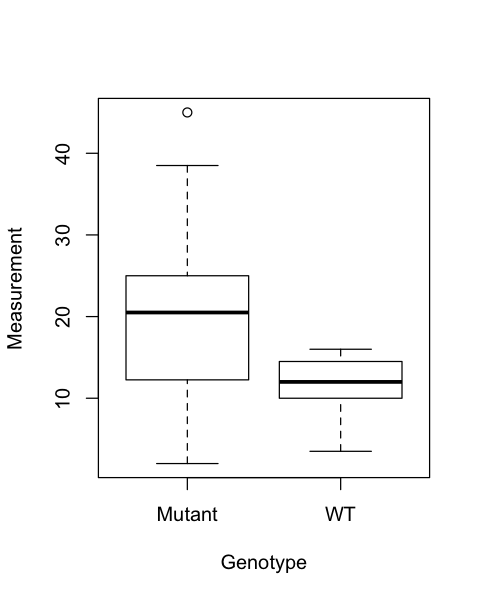

null device 
          1

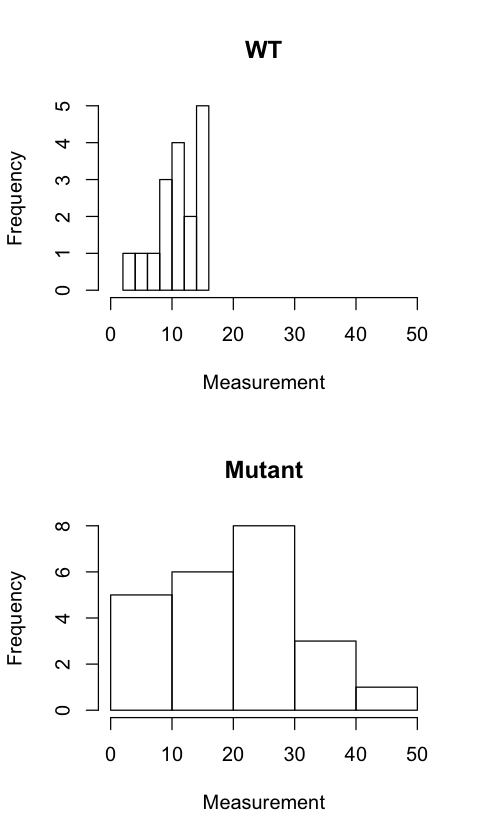

In [6]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=5)
# plot data as boxplot
plot(data1)
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=7)
# plot data as stacked histograms
par(mfrow=c(2,1))
hist(data1[data1$Genotype == 'WT',]$Measurement, main = 'WT', xlab = 'Measurement', xlim = c(0,50))
hist(data1[data1$Genotype == 'Mutant',]$Measurement, main = 'Mutant', xlab = 'Measurement', xlim = c(0,50))
dev.off()

In [7]:
(stats1 <- ddply(data1, .(Genotype), summarize,
      N = length(Measurement),
      Median = median(Measurement),
      Mean = mean(Measurement),
      SD = sd(Measurement),
      Var = var(Measurement)
     ))
# note that by putting parentheses around the line of code above, R will both save the table to the stats1 object
# and will print the table out. Without the parentheses it would only be saved to stats1 and not print out.

Genotype,N,Median,Mean,SD,Var
Mutant,23,20.5,20.09043,10.962370,120.17356
WT,17,12.0,11.44118,3.570199,12.74632


The plot() function by default makes a boxplot for this kind of data. From the boxplot you can tell that the variances are somewhat different between genotypes. The hist() function makes histograms. The stacked histograms give a sense for the shapes of each distribution. Although neither looks perfectly normal, neither is strongly skewed. The ddply() function (from the plyr package that we installed and loaded above) helps us organize our summary statistics for each genotype. The median and mean values for each genotype are very similar, confirming that the distributions are not highly skewed. From this information, we will say that the data have met the t-test assumption of normally distributed responses in each treatment. What about equal variances between treatments? The variances are an order of magnitude different, which violates the assumption of the t-test.

Instead of a Student's t-test, we can run a Welch's t-test which assumes normality but does not assume equal variances.

In [8]:
# run Welch's t-test on data with alpha set to 0.05
t.test(data1[data1$Genotype == 'WT',]$Measurement, data1[data1$Genotype == 'Mutant',]$Measurement)


	Welch Two Sample t-test

data:  data1[data1$Genotype == "WT", ]$Measurement and data1[data1$Genotype == "Mutant", ]$Measurement
t = -3.5385, df = 27.975, p-value = 0.001427
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.656431  -3.642085
sample estimates:
mean of x mean of y 
 11.44118  20.09043 


Our p-value is less than our alpha value of 0.05 so we reject the null hypothesis that genotype has no effect on our measured response. When reporting this result in a paper it is best to include t, df, and p-value. Here is what that might look like:

The mutant had significantly different measurements than wild type (Welch's t(2,0.05) = -3.54, df = 27.98, p-value < 0.00143).

The numbers in parentheses next to the t are 2 for a two-sided test (i.e. allowing the effect of the mutant to both increase or decrease the measurement) and 0.05 for the alpha value.

In addition to reporting the result in text, we can also show our data and our results using a figure. We are going to make a stripchart that includes the mean and 95% confidence intervals for each genotype. First we calculate the 95% confidence intervals around the means for each genotype.

In [9]:
# calculate 95% confidence intervals
# here is a function to calculate the magnitude of one side of the 95% interval
intmag95 <- function(x) {
    sem <- sd(x) / sqrt(length(x))
    t <- qt(0.975, df = length(x) - 1)
    sem * t
}
# here are two functions to calculate the upper and lower bounds of the 95% interval
upper95 <- function(x) mean(x) + intmag95(x)
lower95 <- function(x) mean(x) - intmag95(x)
# now calculate the 95% confidence intervals for both genotypes
(data1.95ci <- ddply(data1, .(Genotype), summarize,
                     IntMag95 = intmag95(Measurement),
                     Upper95 = upper95(Measurement),
                     Lower95 = lower95(Measurement)
                    ))

Genotype,IntMag95,Upper95,Lower95
Mutant,4.740484,24.83092,15.349950
WT,1.835627,13.27680,9.605549


We created three functions to help us calculate the 95% confidence intervals. The first function intmag95() calculates the magnitude of one half of the interval. It multiplies the SEM by the t statistic value that corresponds with an alpha value of 0.05. The upper95() and lower95() functions simply add or subtract the intmag95() value to/from the mean to get the actual value of the top and bottom of the confidence interval.

We then used the ddply() function again to run these functions we just wrote on the measurement values for each genotype. Looking at the table, you can see that the 95% confidence intervals for the two genotypes do not overlap. When 95% confidence intervals do not overlap, you can be sure that a statistical test will reject the null hypothesis of the categories have equal responses. And that is the case for us here.

Now we want to display the data, means, and confidence intervals.

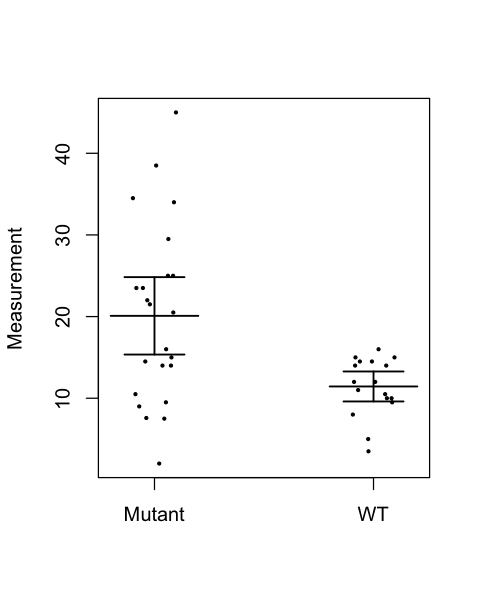

In [10]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=5)
# diplay results as a strip chart with mean and 95% confidence intervals
stripchart(Measurement ~ Genotype, data = data1, vertical=TRUE, method="jitter", ylab = 'Measurement', pch = 20, cex = 0.5)
segments(0.8, stats1$Mean[1], 1.2, stats1$Mean[1], lwd = 1.5)
arrows(1, data1.95ci$Upper95[1], 1, data1.95ci$Lower95[1][1], angle = 90, code = 3, lwd = 1.5)
segments(1.8, stats1$Mean[2], 2.2, stats1$Mean[2], lwd = 1.5)
arrows(2, data1.95ci$Upper95[2], 2, data1.95ci$Lower95[2], angle = 90, code = 3, lwd = 1.5)

The above stripchart conveys a lot of information to the reader. It shows the actual data points for each genotype and how they are distributed. It shows the mean values. And it shows the 95% confidence intervals which do not overlap and therefore convey that the mutant is significantly different than the wild type in measurement response.

# Example 2: Student's t-test on log transformed responses
In this second example we are working with a very similar dataset. The dataset has the same types of variables and we are interested in the same biological hypothesis. The difference comes when we inspect the data to see if it meets the assumptions of a Student's t-test.

In [11]:
# read second data file into data frame object
data2 <- read_xlsx('DataSet2.xlsx', col_names = TRUE)
# look at the first several rows of data
head(data2)
# make genotype column a categorical variable which are called factors in R
data2$Genotype <- as.factor(data2$Genotype)
# check that data structure is correct
str(data2)
# look at summary information
summary(data2)

Genotype,Measurement
WT,34.510
WT,26.355
WT,22.285
WT,30.940
WT,26.160
WT,26.355


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	63 obs. of  2 variables:
 $ Genotype   : Factor w/ 2 levels "Mutant","WT": 2 2 2 2 2 2 2 2 2 2 ...
 $ Measurement: num  34.5 26.4 22.3 30.9 26.2 ...


   Genotype   Measurement   
 Mutant:34   Min.   :22.29  
 WT    :29   1st Qu.:30.11  
             Median :39.31  
             Mean   :39.20  
             3rd Qu.:45.39  
             Max.   :63.04  

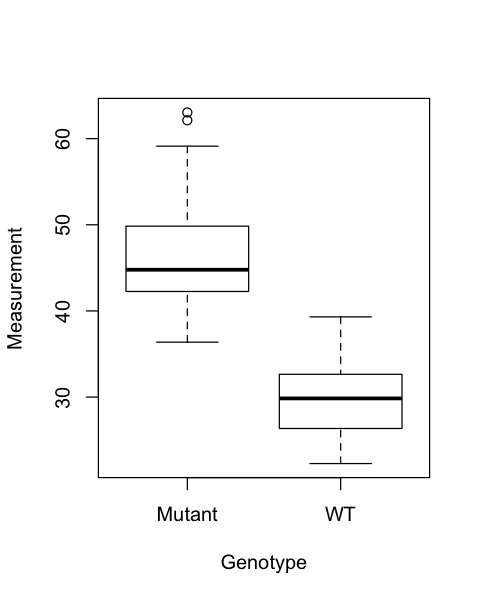

null device 
          1

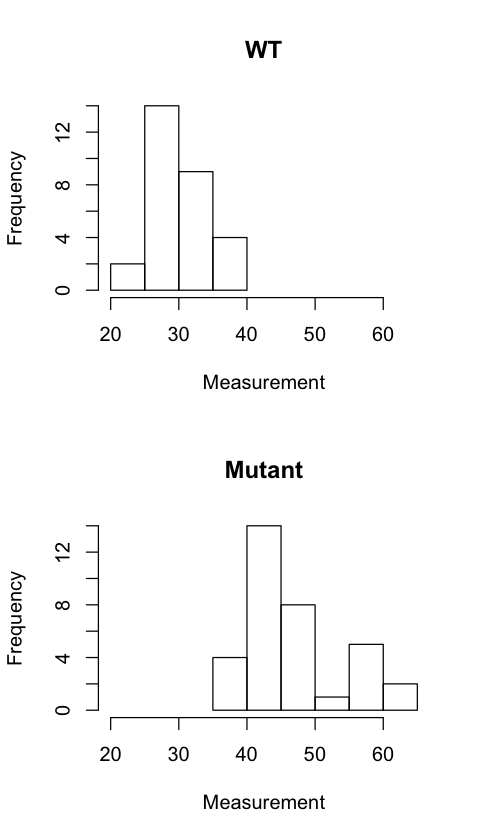

In [12]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=5)
# plot data as boxplot
plot(data2)
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=7)
# plot data as stacked histograms
par(mfrow=c(2,1))
hist(data2[data2$Genotype == 'WT',]$Measurement, main = 'WT', xlab = 'Measurement', xlim = c(20,65))
hist(data2[data2$Genotype == 'Mutant',]$Measurement, main = 'Mutant', xlab = 'Measurement', xlim = c(20,65))
dev.off()

In [13]:
(stats2 <- ddply(data2, .(Genotype), summarize,
      N = length(Measurement),
      Median = median(Measurement),
      Mean = mean(Measurement),
      SD = sd(Measurement),
      Var = var(Measurement)
     ))

Genotype,N,Median,Mean,SD,Var
Mutant,34,44.7825,47.06406,7.304294,53.35271
WT,29,29.8450,29.98086,4.254345,18.09945


With regard to normality, the measurement responses appear to be somewhat skewed to the right. The median values are less than the mean values, consistent with a slight skew. This might be a violation of the assumption of normality. The responses for the mutant also appear to be slightly bimodal. Student's t-test is robust to small deviations from normality so it is unclear if these departures from normality will be a problem.

The variances are just about three-fold different. Student's t-test is robust to this level of difference in variance but only when the design is balanced. The sample sizes are somewhat different so again we are close to violating this assumption.

The skew in the response is the more serious violation because if it cannot be corrected then we will need to use a non-parametric test with lower power. Right-skewed distributions can sometimes be corrected using a natural log or reciprocal transformation. Note that the function log() in R defaults to the natural log, which is commonly written as ln.

null device 
          1

Genotype,N,Median,Mean,SD,Var
Mutant,34,3.801812,3.840482,0.1486929,0.02210958
WT,29,3.396017,3.391070,0.1395342,0.01946978


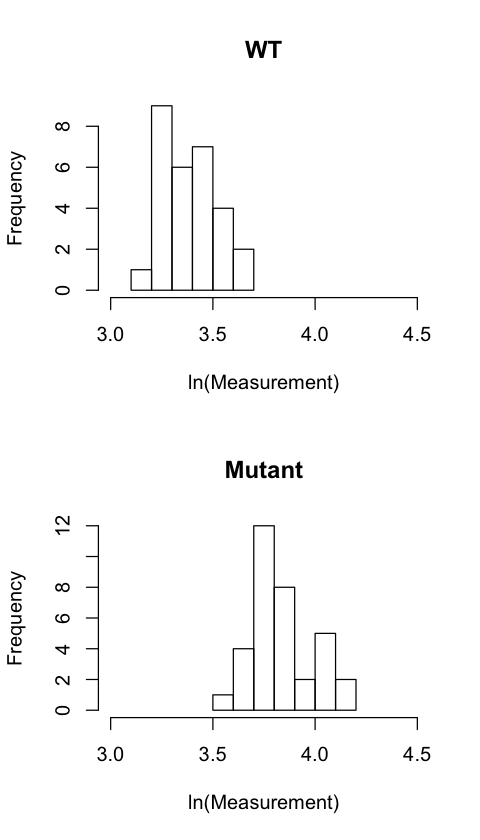

In [14]:
# ln transformation
data2$LnMeasurement <- log(data2$Measurement)
# plot data as stacked histograms
par(mfrow=c(2,1))
hist(data2[data2$Genotype == 'WT',]$LnMeasurement, main = 'WT', xlab = 'ln(Measurement)', xlim = c(3,4.5))
hist(data2[data2$Genotype == 'Mutant',]$LnMeasurement, main = 'Mutant', xlab = 'ln(Measurement)', xlim = c(3,4.5))
dev.off()
# descriptive stats
(stats2.Ln <- ddply(data2, .(Genotype), summarize,
      N = length(LnMeasurement),
      Median = median(LnMeasurement),
      Mean = mean(LnMeasurement),
      SD = sd(LnMeasurement),
      Var = var(LnMeasurement)
     ))

null device 
          1

Genotype,N,Median,Mean,SD,Var
Mutant,34,0.02233041,0.02170803,0.003091255,9.555856e-06
WT,29,0.03350645,0.03398694,0.004673262,2.183938e-05


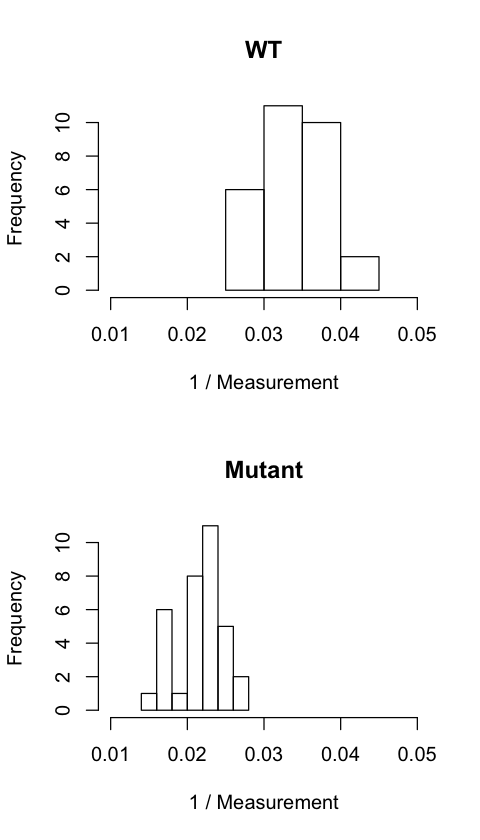

In [15]:
# reciprocal transformation
data2$RecipMeasurement <- 1 / data2$Measurement
par(mfrow=c(2,1))
hist(data2[data2$Genotype == 'WT',]$RecipMeasurement, main = 'WT', xlab = '1 / Measurement', xlim = c(0.01,0.05))
hist(data2[data2$Genotype == 'Mutant',]$RecipMeasurement, main = 'Mutant', xlab = '1 / Measurement', xlim = c(0.01,0.05))
dev.off()
# descriptive stats
(stats2.recip <- ddply(data2, .(Genotype), summarize,
      N = length(RecipMeasurement),
      Median = median(RecipMeasurement),
      Mean = mean(RecipMeasurement),
      SD = sd(RecipMeasurement),
      Var = var(RecipMeasurement)
     ))

Both transformations improved the shape of the distributions to be more normal in appearance. The natural log transformation also resulted in the variances being very similar between genotypes, while the reciprocal did not. The dataset with natural log transformations of the measurement responses meet the assumptions of Student's t-test.

In [16]:
# run t-test on ln transformed data with alpha set to 0.05 and assumption of equal variance
t.test(data2[data2$Genotype == 'WT',]$LnMeasurement, data2[data2$Genotype == 'Mutant',]$LnMeasurement, var.equal = TRUE)


	Two Sample t-test

data:  data2[data2$Genotype == "WT", ]$LnMeasurement and data2[data2$Genotype == "Mutant", ]$LnMeasurement
t = -12.299, df = 61, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5224811 -0.3763438
sample estimates:
mean of x mean of y 
 3.391070  3.840482 


In [17]:
# now calculate the 95% confidence intervals for both genotypes
(data2.95ci <- ddply(data2, .(Genotype), summarize,
                     IntMag95 = intmag95(LnMeasurement),
                     Upper95 = upper95(LnMeasurement),
                     Lower95 = lower95(LnMeasurement)
                    ))

Genotype,IntMag95,Upper95,Lower95
Mutant,0.05188140,3.892363,3.788601
WT,0.05307596,3.444146,3.337994


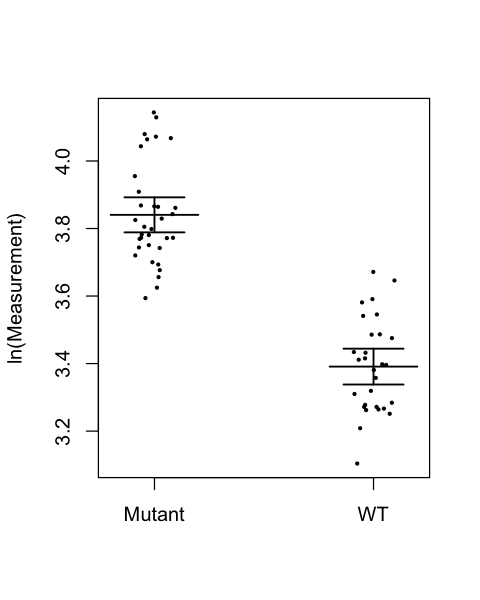

In [18]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=5)
# diplay results as a strip chart with mean and 95% confidence intervals
stripchart(LnMeasurement ~ Genotype, data = data2, vertical=TRUE, method="jitter", ylab = 'ln(Measurement)', pch = 20, cex = 0.5)
segments(0.8, stats2.Ln$Mean[1], 1.2, stats2.Ln$Mean[1], lwd = 1.5)
arrows(1, data2.95ci$Upper95[1], 1, data2.95ci$Lower95[1][1], angle = 90, code = 3, lwd = 1.5)
segments(1.8, stats2.Ln$Mean[2], 2.2, stats2.Ln$Mean[2], lwd = 1.5)
arrows(2, data2.95ci$Upper95[2], 2, data2.95ci$Lower95[2], angle = 90, code = 3, lwd = 1.5)

The mutant had significantly different measurements than wild type (Student's t(2,0.05) = -12.299, df = 61, p-value < 2.2e-16).

The figure supports this conclusion with non-overlapping 95% confidence intervals.

# Example 3: Logistic regression for categorical response and two treatment variables
In the first two examples we had a continuous numerical response variable and a single categorical treatment variable. In this example we have a categorical response variable (Phenotype) and two categorical treatment variables (Genotype & Day).

Our biological hypothesis is that genotype (disomic vs trisomic) affects the proportion of cells that are ciliated. Data was collected over many days so we include Day as a so called 'nuisance' treatment variable. Our statistical null hypotheses are that the proportion of ciliated cells is the same across genotypes and that the proportion of ciliated cells is the same across days.

We can test these hypotheses using logistic regression in a generalize linear model and a series of Wald tests. This approach makes few assumptions about the structure of the data and the glm() function that we will use will warn us if our data are not meeting those assumptions.

In [19]:
# read third data file into data frame object
data3 <- read_xlsx('DataSet3.xlsx', col_names = TRUE)
head(data3)
# from Domenico Galati et al 2018, Fig 1 (https://doi.org/10.1016/j.devcel.2018.07.008)
# make all three columns factors which are categorical variables in R
data3$Phenotype <- as.factor(data3$Phenotype)
data3$Genotype <- as.factor(data3$Genotype)
data3$Day <- as.factor(data3$Day)
# check that data structure is correct
str(data3)
# look at summary tables
table(data3)

Phenotype,Genotype,Day
Ciliated,Disomic,1
Ciliated,Disomic,1
Ciliated,Disomic,1
Ciliated,Disomic,1
Ciliated,Disomic,1
Ciliated,Disomic,1


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1058 obs. of  3 variables:
 $ Phenotype: Factor w/ 2 levels "Ciliated","Not Ciliated": 1 1 1 1 1 1 1 1 1 1 ...
 $ Genotype : Factor w/ 2 levels "Disomic","Trisomic": 1 1 1 1 1 1 1 1 1 1 ...
 $ Day      : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


, , Day = 1

              Genotype
Phenotype      Disomic Trisomic
  Ciliated          78       16
  Not Ciliated      96       83

, , Day = 2

              Genotype
Phenotype      Disomic Trisomic
  Ciliated          23        8
  Not Ciliated     102       94

, , Day = 3

              Genotype
Phenotype      Disomic Trisomic
  Ciliated          13       10
  Not Ciliated      59       68

, , Day = 4

              Genotype
Phenotype      Disomic Trisomic
  Ciliated          63       14
  Not Ciliated      57       74

, , Day = 5

              Genotype
Phenotype      Disomic Trisomic
  Ciliated          51       20
  Not Ciliated      57       72


We will now run the glm() function on the data. We need to tell the glm() function which variable is the response variable and which variables are treatment variables. This is done in R by putting the response variable to the left of a tilda symbol and the treatment variables to the right of the tilda symbol with plus signs between treatment variables. The glm() function also needs to know what kind of regression we plan to do. Because our response variable is a binary categorical variable, the appropriate type of regression is called logistic regression. We specify this by telling glm() to use a binomial error distribution. The binomial distribution quantifies the probability of a binary outcome, like flipping a coin to get heads versus tails. Here, the binary outcome is ciliated versus not, and the logistic regression model is a way to allow the probability of being ciliated to depend on genotype and day.

In [20]:
# build a generalized linear model of Phenotype with binomial errors and Genotype and Day as treatments
model3 <- glm(Phenotype ~ Genotype + Day, family = binomial(), data = data3)
summary(model3)


Call:
glm(formula = Phenotype ~ Genotype + Day, family = binomial(), 
    data = data3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3449  -1.1991   0.6291   0.7300   1.1558  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.2490     0.1381   1.803 0.071422 .  
GenotypeTrisomic   1.2705     0.1602   7.933 2.14e-15 ***
Day2               1.1638     0.2371   4.909 9.14e-07 ***
Day3               0.9373     0.2671   3.510 0.000448 ***
Day4              -0.1980     0.1999  -0.990 0.322117    
Day5              -0.1744     0.2037  -0.856 0.391964    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1254.2  on 1057  degrees of freedom
Residual deviance: 1125.5  on 1052  degrees of freedom
AIC: 1137.5

Number of Fisher Scoring iterations: 4


The section of the glm() function output that we are most interested in is the coefficients. The line that starts with "GenotypeTrisomic" tells us about the effect of genotype. The magnitude of the effect of being Trisomic vs Disomic is 1.2705. This coefficient is calculated as the natural log of the odds ratio. A Wald test was run on this coefficient to determine if it is a significant departure from what would be expected if there was no effect of genotype. The Wald test is based on z-scores. Dividing the coefficient by the standard error results in a z-score of 7.933 which has a p-value of 2.14e-15. So genotype has a very significant effect on the proportion of cells with cilia.

Simiarly, there were significant effects of what day the experiment was conducted on. Day2 and Day3 were both significantly different from Day1. Although the effect of day was not of interest, by including it as a variable in the model we were able to estimate and therefore control for significant variation in the proportion of cells with cilia across days. Controling for the day effect allowed us to more accurately estimate the effect and significance of genotype.

Next we want to display our results. It is very common to see this kind of data displayed as a bar graph with proportion or percentage on the y-axis and the different treatment categories on the x-axis. That is a fine way to display the data but it doesn't convey information about the hypothesis being tested.

An Odds Ratio plot is an excellent way to convey the effect of a binary categorical treatment variable on a binary categorical response variable. In this case the Odds Ratio = (Ciliated Disomic / Not Ciliated Disomic) / (Ciliated Trisomic / Not Ciliated Trisomic). As mentioned above, the coefficient estimated for GenotypeTrisomic is the natural log of the odds ratio. So the inverse natural log (i.e. 'e') of the coefficient is the odds ratio. Although it was not printed out to the screen, the glm() function also calculated the 95% confidence interval for the coefficient, which can also be converted to an odds ratio using the inverse natural log.

Waiting for profiling to be done...
Waiting for profiling to be done...
Waiting for profiling to be done...


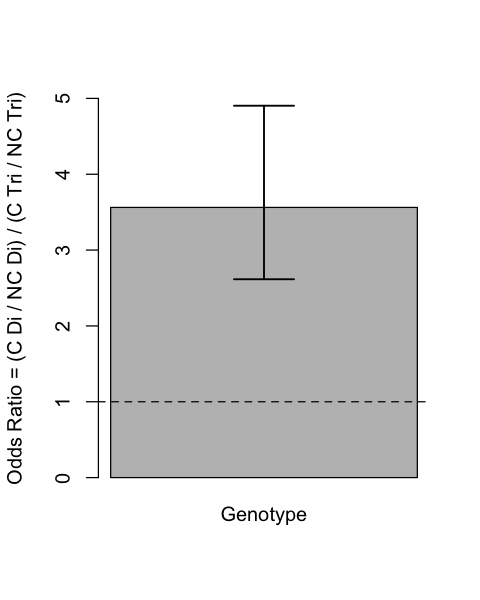

In [21]:
x.loc <- barplot(exp(coef(model3)[[2]]), names.arg = c('Genotype'), ylab = 'Odds Ratio = (C Di / NC Di) / (C Tri / NC Tri)', ylim = c(0,ceiling(exp(confint(model3))[2,2])))
arrows(x.loc, exp(confint(model3))[2,2], x.loc, exp(confint(model3))[2,1], angle = 90, code = 3, lwd = 1.5)
abline(h = 1, lty = 2)

The figure conveys that the odds of having cilia in disomic cells is ~3.5 times higher than in trisomic cells. It also conveys that this difference significantly exceeds the null expectation of equal odds (the dashed line at 1), consistent with the small and significant p-value from the Wald test run by the glm() function.

# Example 4: Chi-Square contingency test on combined response and combined treatment groups
This example is similar to the previous example in that there is a categorical response variable and the treatment is categorical. However, in this example there is only one categorical treatment variable so instead of logistic regression we can run a chi-square contingency test.

The biological hypothesis is that loss of expression of the gene JMJD2A causes decreased expression of the gene Sox2 in developing chicken neural plate. The four treatments were control morpholino (Control-MO), translation blocking JMJD2A morpholino (JmjD2A-tbMO), splicing blocking JMJD2A morpholino (JmjD2A-sbMO), and splicing blocking JMJD2A morpholino plus JmjD2A full-length rescue vector. The response was Sox2 expression for each embryo categorized as full wild type expression (WT), mild decrease in expression (Mild), or strong decrease in expression (Strong). An appropriate null hypothesis is that Sox2 expression response is independent of JMJD2A treatment.

We can test our null hypothesis with a chi-square contingency test. The test calculates the expected counts of each combination of treatment and response assuming independence. The assumptions of the test are that none of the expected counts are less than 1 and <20% of the expected counts are less than 5. Let's look at the data to see if they meet these assumptions.

In [22]:
# read fourth data file into data frame object
data4 <- read_xlsx('DataSet4.xlsx', col_names = TRUE)
head(data4)
# from Santiago O. Bouzas et al 2016, Fig 2 (https://doi.org/10.1091/mbc.e16-01-0042)
# make both columns factors which are categorical variables in R
data4$Phenotype <- as.factor(data4$Phenotype)
data4$Treatment <- as.factor(data4$Treatment)
# check that data structure is correct
str(data4)
# create a contingency table
(data4.table <- table(data4))

Treatment,Phenotype
Control-MO,Mild
Control-MO,Mild
Control-MO,WT
Control-MO,WT
Control-MO,WT
Control-MO,WT


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	86 obs. of  2 variables:
 $ Treatment: Factor w/ 4 levels "Control-MO","JmjD2A-sbMO",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Phenotype: Factor w/ 3 levels "Mild","Strong",..: 1 1 3 3 3 3 3 3 3 3 ...


                        Phenotype
Treatment                Mild Strong WT
  Control-MO                2      0 20
  JmjD2A-sbMO               3      7  2
  JmjD2A-sbMO+pCI-JmjD2A    4      2  9
  JmjD2A-tbMO              10     14 13

The table() function converted the long format data into a table of counts for combinations of treatment and phenotype (Sox2 expression). An efficient way to get the expected counts from the observed counts is to run the chisq.test() function and then print out the expected counts which it calculates.

In [23]:
# run chi-square test with correct = F because this is not a 2x2 table
chitest4 <- chisq.test(data4.table, correct = F)
# print expected counts
chitest4$expected

Warning message in chisq.test(data4.table, correct = F):
“Chi-squared approximation may be incorrect”

,Mild,Strong,WT
Control-MO,4.860465,5.883721,11.255814
JmjD2A-sbMO,2.651163,3.209302,6.139535
JmjD2A-sbMO+pCI-JmjD2A,3.313953,4.011628,7.674419
JmjD2A-tbMO,8.174419,9.895349,18.930233


Although the expected counts meet the first assumption that none can be less than 1, they do not meet the second assumption that <20% are less than 5. 5 out of 12 (41.7%) are less than 5.

There are two ways to handle this situation. One way is to increase sample sizes for each of the treatments. Another way is to consider if any of the treatment or response categories could be combined such that the assumption is satisfied while keeping the outcome of the hypothesis test interpretable and meaningful.

Given the biological hypothesis that loss of expression of the gene JMJD2A causes decreased expression of the gene Sox2, the two treatments intended to decrease expression of JMJD2A (JmjD2A-tbMO & JmjD2A-sbMO) could be combined and the two responses that involve decreased expression of Sox2 (Mild & Strong) could be combined.

In [24]:
# this is an inelegant way of making a new counts table with JmjD2A-tbMO & JmjD2A-sbMO combined and Mild & Strong combined
(data4.table.comb <- matrix(c(2+0,20,3+7+10+14,2+13,4+2,9), nrow = 3, byrow = T, dimnames = list(Treatment = c("Control-MO","JmjD2A-sbMO+tbMO","JmjD2A-sbMO+pCI-JmjD2A"), Phenotype = c("Mild+Strong","WT"))))

,Mild+Strong,WT
Control-MO,2,20
JmjD2A-sbMO+tbMO,34,15
JmjD2A-sbMO+pCI-JmjD2A,6,9


Now check the expected counts for this new observed counts table.

In [25]:
# run chi-square test with correct = F because this is not a 2x2 table
chitest4comb <- chisq.test(data4.table.comb, correct = F)
# print expected counts
chitest4comb$expected

,Mild+Strong,WT
Control-MO,10.744186,11.255814
JmjD2A-sbMO+tbMO,23.930233,25.069767
JmjD2A-sbMO+pCI-JmjD2A,7.325581,7.674419


Now all expected values are 5 or more so the assumptions of the test have been met.

In [26]:
chitest4comb


	Pearson's Chi-squared test

data:  data4.table.comb
X-squared = 22.66, df = 2, p-value = 1.201e-05


The test resulted in a significant p-value. So we reject the null hypothesis that Sox2 expression is independent of treatments decreasing JMJD2A expression.

A table is an excellent way of displaying data from a contingency analysis. If a figure is desired, a mosaic plot is an appropriate type of graph.

,Mild+Strong,WT
Control-MO,0.09090909,0.9090909
JmjD2A-sbMO+tbMO,0.69387755,0.3061224
JmjD2A-sbMO+pCI-JmjD2A,0.40000000,0.6000000


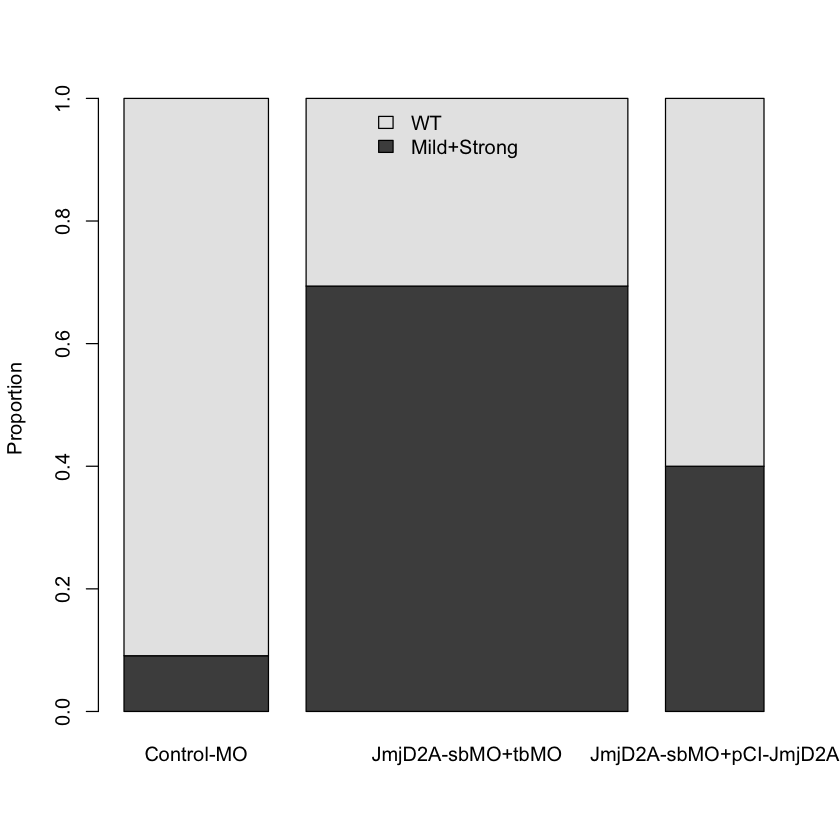

In [27]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=7, repr.plot.height=7)
# first make a table of proportions rather than counts
(data4.table.comb.prop <- data4.table.comb / matrix(c(rep(sum(data4.table.comb[1,]),2), rep(sum(data4.table.comb[2,]),2), rep(sum(data4.table.comb[3,]),2)), nrow = 3, byrow = T))
# use barplot to make a mosaic plot
barplot(t(data4.table.comb.prop), legend = T, width = c(sum(data4.table.comb[1,]), sum(data4.table.comb[2,]), sum(data4.table.comb[3,])), ylab="Proportion", args.legend = list(x = "top", bty="n"))

The mosaic plot conveys the differences in response proportions across treatments. Sample sizes for each treatment are reflected in the width of the bars. This figure could be improved by overlaying the counts in each bar.

# Example 5: ANOVA with Tukey-Kramer Post-hoc
In this example there is a categorical treatment variable and a continuous numerical response variable, just like the first two examples. However, in this example, the categorical treatment variable has four groups, three RNAi treatments and one control treatment.

The biological hypothesis is that RNAi against all three members of the ZLW gene family results in decreased fluorescence intensity of a reporter. A common mistake is to perform a series of t-tests, which does not control the false positive rate at or below 0.05. If all six pairwise comparisons were made using t-tests, the false positive rate would be capped at 6 x 0.05 = 0.3, which is quite high. A single ANOVA test can be run to determine if any of the mean responses across treatments are different. The null hypothesis is that the mean responses are the same across all treatments. If we reject this null hypothesis from the ANOVA, we can then run a Tukey-Kramer post-hoc analysis to determine which pairs of treatments are significantly different. And all of that can be done while keeping the false positive rate no higher than 0.05.

ANOVA has the same assumptions as t-tests: normality of responses within treatments and equal variances across treatments. Let's see if the data meet these assumptions.

In [28]:
# read fifth data file into data frame object
data5 <- read_xlsx('DataSet5.xlsx', col_names = TRUE)
head(data5)
# make Treatment column factor which is a categorical variable in R
data5$Treatment <- as.factor(data5$Treatment)
# check that data structure is correct
str(data5)
# look summary information
summary(data5)

Treatment,Intensity
control,22.65740
control,23.57987
control,25.03277
control,28.58105
control,12.63860
control,25.13817


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	298 obs. of  2 variables:
 $ Treatment: Factor w/ 4 levels "control","ZLW1-RNAi",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Intensity: num  22.7 23.6 25 28.6 12.6 ...


     Treatment    Intensity      
 control  :74   Min.   : 0.3958  
 ZLW1-RNAi:73   1st Qu.:10.8099  
 ZLW2-RNAi:76   Median :14.2645  
 ZLW3-RNAi:75   Mean   :14.4173  
                3rd Qu.:17.7509  
                Max.   :30.6101  

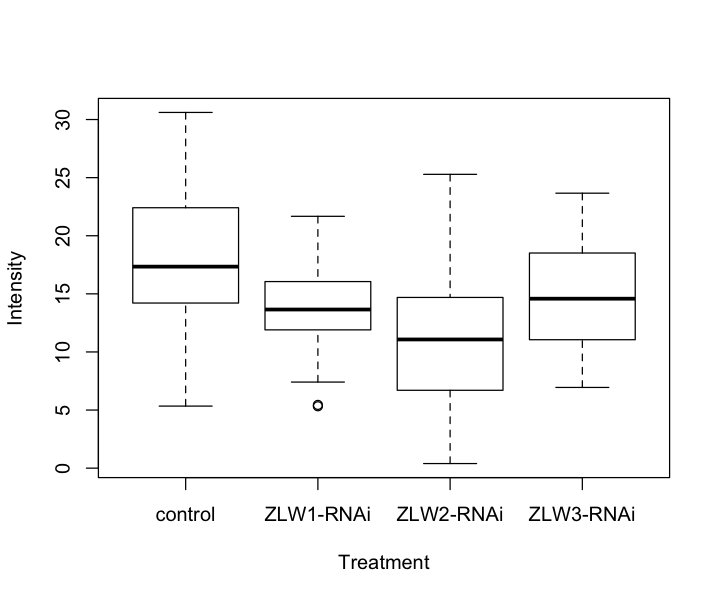

In [29]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=6, repr.plot.height=5)
# plot data as boxplot
plot(data5)

null device 
          1

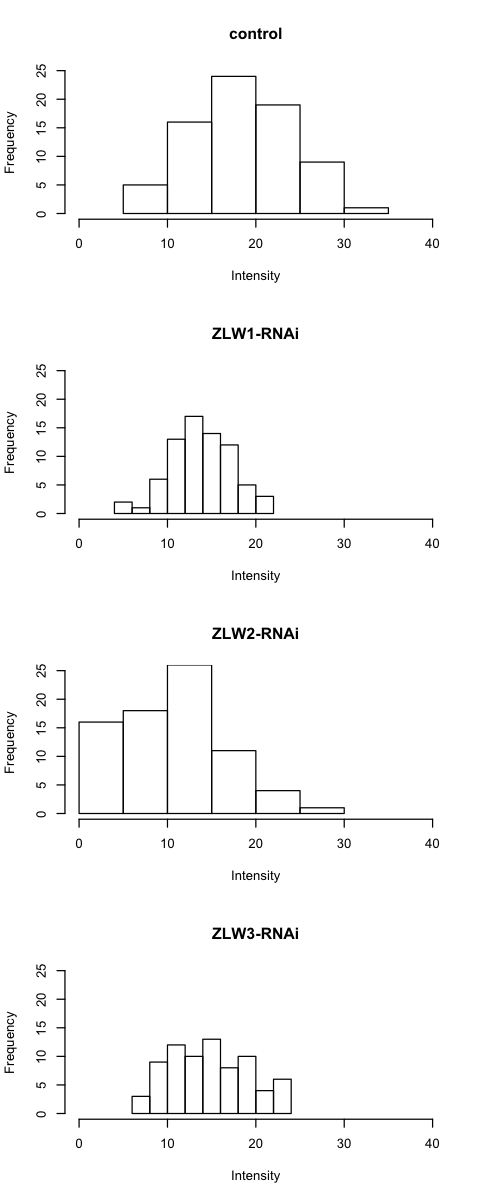

In [30]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=4, repr.plot.height=10)
# plot data as stacked histograms
par(mfrow=c(4,1))
names <- c("control", "ZLW1-RNAi", "ZLW2-RNAi", "ZLW3-RNAi")
for (i in 1:4) hist(data5[data5$Treatment == names[i],]$Intensity, main = names[i], xlab = 'Intensity', xlim = c(0,40), ylim = c(0,25))
dev.off()

In [31]:
(stats5 <- ddply(data5, .(Treatment), summarize,
      N = length(Intensity),
      Median = median(Intensity),
      Mean = mean(Intensity),
      SD = sd(Intensity),
      Var = var(Intensity)
     ))

Treatment,N,Median,Mean,SD,Var
control,74,17.34206,18.26805,5.564848,30.96753
ZLW1-RNAi,73,13.65137,13.77063,3.437403,11.81574
ZLW2-RNAi,76,11.07473,10.90948,5.808174,33.73489
ZLW3-RNAi,75,14.58257,14.80203,4.420197,19.53814


The distributions of responses for each treatment look approximately normally distributed. The variances are not equal but are all less than three fold different. ANOVA is robust to this level of difference in variance as long as the experiment is balanced. Sample sizes are large and almost identical so it is balanced. It appears we have met the assumptions of ANOVA.

In [32]:
# ANOVA
(data5.aov <- aov(Intensity ~ Treatment, data = data5))
summary(data5.aov)

Call:
   aov(formula = Intensity ~ Treatment, data = data5)

Terms:
                Treatment Residuals
Sum of Squares   2074.083  7087.302
Deg. of Freedom         3       294

Residual standard error: 4.909834
Estimated effects may be unbalanced

             Df Sum Sq Mean Sq F value  Pr(>F)    
Treatment     3   2074   691.4   28.68 2.7e-16 ***
Residuals   294   7087    24.1                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The aov() function, like the glm() function from the third example, takes an equation written as Response ~ Treatment. In our case that was Intensity ~ Treatment. The summary() function provides the results we seek. ANOVA runs what is called an F-test. Large values of F mean that the differences in responses amongst treatments are large compared to differences in responses within treatments. F values close to 1 mean that the differences in responses amongst treatments are similar to differences in responses within treatments. In our case, we got an F value of 28.68, which is very large and has a very significant p-value of 2.7e-16. We therefore reject the null hypothesis that the mean responses are the same across treatments.

If and only if you get a significant result from an ANOVA, you can run a Tukey-Kramer post-hoc analysis to determine which pairs of treatments differ significantly.

In [33]:
# Tukey-Kramer Post-hoc
(TukeyHSD(data5.aov))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Intensity ~ Treatment, data = data5)

$Treatment
                         diff       lwr        upr     p adj
ZLW1-RNAi-control   -4.497413 -6.590101 -2.4047251 0.0000004
ZLW2-RNAi-control   -7.358565 -9.430357 -5.2867738 0.0000000
ZLW3-RNAi-control   -3.466019 -5.544614 -1.3874250 0.0001315
ZLW2-RNAi-ZLW1-RNAi -2.861152 -4.940121 -0.7821835 0.0024652
ZLW3-RNAi-ZLW1-RNAi  1.031394 -1.054355  3.1171419 0.5778909
ZLW3-RNAi-ZLW2-RNAi  3.892546  1.827764  5.9573277 0.0000108


The TukeyHSD() function performed the post-hoc analysis. The function returns a table with each of the six pairwise comparisons of treatments as the rows. The columns are 'diff', which is the difference in mean responses between the two treatments, 'lwr' and 'upr', which are the bounds of the 95% confidence interval for the 'diff', and 'p adj', which is the p-value from a q-test. In this case, five of the six possible pairwise comparisons had significantly different responses, demonstrated by a 'p adj' value less than 0.05 and a confidence interval that does not overlap zero. Only ZLW3 RNAi vs ZLW1 RNAi was not significant.

By using the ANOVA to Tukey-Kramer approach, we have kept the false positive rate at or below 0.05. We can draw the conclusion that RNAi of all three ZLW family genes significantly decreases fluorescence intensity of our reporter relative to a control. We can further say that RNAi of ZLW2 has a stronger effect on the fluorescence intensity of the reporter than ZLW1 and ZLW3.

For displaying our results in a figure, we can use a stripchart with mean and 95% confidence intervals overlayed like we did for examples 1 and 2. We have already calculated the mean responses for each treatment. Now we need to extract the 95% confidence intervals from the ANOVA result using the confint() function.

In [34]:
(data5.95ci <- confint(data5.aov))
data5.95ci[2:4,] <- data5.95ci[2:4,] + stats5[1,4]
data5.95ci

,2.5 %,97.5 %
(Intercept),17.144759,19.391332
TreatmentZLW1-RNAi,-6.091411,-2.903415
TreatmentZLW2-RNAi,-8.936647,-5.780484
TreatmentZLW3-RNAi,-5.049282,-1.882756


,2.5 %,97.5 %
(Intercept),17.144759,19.39133
TreatmentZLW1-RNAi,12.176635,15.36463
TreatmentZLW2-RNAi,9.331399,12.48756
TreatmentZLW3-RNAi,13.218764,16.38529


The function confint() gets the 95% confidence intervals for the first treatment and refers to this treatment as the intercept. In our case, that was ZLW1-RNAi. It then gets the confidence intervals for the other treatments relative to the "intercept" which is the mean response of ZLW1-RNAi. So in order to get the absolute confidence intervals rather than the relative confidence intervals, we have to add the mean response of ZLW1-RNAi (stored in stats5[1,4]) to all the remaining confidence interval lower and upper values. The second table printed has the absolute confidence intervals.

Now we can make the stripchart.

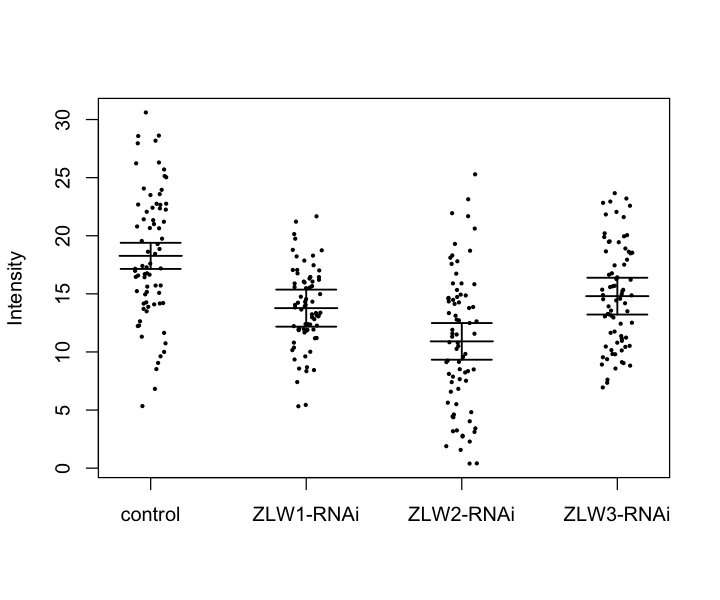

In [35]:
# set plot width & height (only needed for Jupyter)
options(repr.plot.width=6, repr.plot.height=5)
# diplay results as a strip chart with mean and 95% confidence intervals
stripchart(Intensity ~ Treatment, data = data5, vertical=TRUE, method="jitter", ylab = 'Intensity', pch = 20, cex = 0.5)
for (i in 1:4) {
  segments(i - 0.2, stats5[i,4], i + 0.2, stats5[i,4], lwd = 1.5)
  arrows(i, data5.95ci[i,1], i, data5.95ci[i,2], angle = 90, code = 3, lwd = 1.5)
}

The figure shows the distribution of responses for each treatment which makes clear that these are overlapping distributions. The 95% confidence intervals around the mean response for each treatment however echo the results from the ANOVA and Tukey-Kramer post-hoc analysis, which is that the means are not equal and all of the treatments have significantly different responses with the exception of ZLW1-RNAi and ZLW3-RNAi. For ZLW1-RNAi and ZLW3-RNAi, the mean response of each treatment is contained within the confidence interval of the other treatment, making it clear that these are not significantly different treatments.